In [232]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_theme(palette=sns.color_palette("twilight_shifted"))

# Pinhole Camera
## Exercise 2.1

#### Resolution in pixels:
We have $\delta_x = 400$ and $\delta_y = 400$. We know, that both $\delta$ are signifying the distance from the middle of the image to the border of the image. The resolution is then $2\delta_x \times 2\delta_y = 800 \times 800$

In [2]:
def box3d(n: int) -> np.array:
    l = np.linspace(-.5, .5, n)
    ones = np.zeros(n)

    box = np.array([l, ones, ones])
    box = np.append(box, [l, ones-.5, ones-.5], axis=1)
    box = np.append(box, [l, ones-.5, ones+.5], axis=1)
    box = np.append(box, [l, ones+.5, ones+.5], axis=1)
    box = np.append(box, [l, ones+.5, ones-.5], axis=1)

    box = np.append(box, [ones, l, ones], axis=1)
    box = np.append(box, [ones-.5, l, ones-.5], axis=1)
    box = np.append(box, [ones-.5, l, ones+.5], axis=1)
    box = np.append(box, [ones+.5, l, ones+.5], axis=1)
    box = np.append(box, [ones+.5, l, ones-.5], axis=1)

    box = np.append(box, [ones, ones, l], axis=1)
    box = np.append(box, [ones-.5, ones-.5, l], axis=1)
    box = np.append(box, [ones-.5, ones+.5, l], axis=1)
    box = np.append(box, [ones+.5, ones+.5, l], axis=1)
    box = np.append(box, [ones+.5, ones-.5, l], axis=1)

    return box

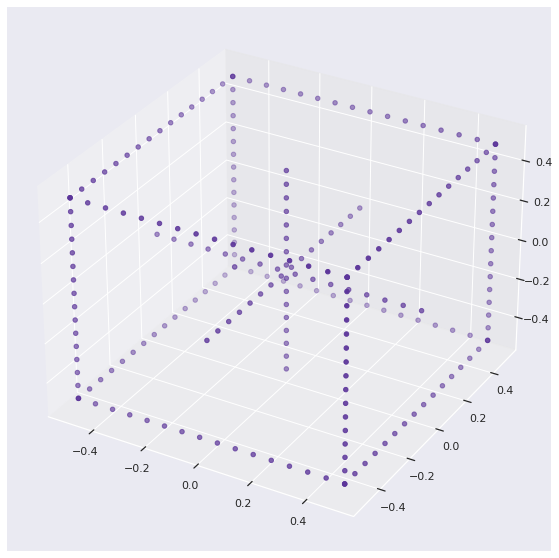

In [124]:
box = box3d(16)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.scatter(box[0], box[1], box[2])
plt.show()

P = array([[600. ,   0. , 400. , 600. ],
       [  0. , 600. , 400. , 720. ],
       [  0. ,   0. ,   1. ,   1.5]])


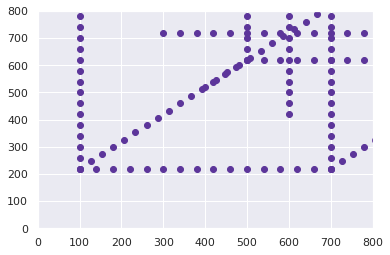

P = array([[600. ,   0. , 400. , 600. ],
       [  0. , 600. , 400. , 720. ],
       [  0. ,   0. ,   1. ,   1.5]])
Where does point P1 project to?
[100. 220.]


In [128]:
def projectpoints(K: np.array, R: np.array, t: np.array, Q: np.array):
    t = t.reshape(len(t), 1)
    Rt = np.append(R, t, axis=1)
    P = K @ Rt
        
    print(f"{P = }")
    Qh = np.append(Q, np.ones((1, Q.shape[1])), axis=0)
    return P @ Qh

f = 600
alpha = 1
beta = 0
delta_x = delta_y = 400

K = np.array([
    [f, beta * f, delta_x],
    [0, alpha * f, delta_y],
    [0, 0, 1]
])

theta = 0
R = np.array([
    [np.cos(np.deg2rad(theta)), 0, np.sin(np.deg2rad(theta))],
    [0, 1, 0],
    [-np.sin(np.deg2rad(theta)), 0, np.cos(np.deg2rad(theta))]
])

t = np.array([0, .2, 1.5])

projected = projectpoints(K, R, t, box)
plt.scatter(projected[0], projected[1])
plt.xlim(0, 800)
plt.ylim(0, 800)
plt.show()


P1 = np.array([-.5, -.5, -.5])
projected_P1 = projectpoints(K, R, t, np.array([P1]).T)
print("Where does point P1 project to?")
print(projected_P1[:-1,0])

## Exercise 2.2
Implement dist in projectpoints function

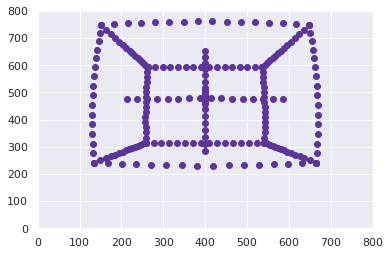

Where does point P1 project to?
[134.98571137 240.99142682]


In [254]:
def projectpointsdist(K: np.array, R: np.array, t: np.array, dist: np.array, Q: np.array):
    t = t.reshape(len(t), 1)
    Rt = np.append(R, t, axis=1)
    homo_Q = np.append(Q, np.ones((1, Q.shape[1])), axis=0)
    
    RtQ = Rt @ homo_Q
    RtQ_inhomo = RtQ[:-1]/RtQ[-1]

    distances = np.linalg.norm(RtQ_inhomo, axis=0)
    coffs_dists = (distances * dist.reshape(dist.size, 1))
    sums = np.sum(coffs_dists, axis=0)
    
    dist_p = RtQ_inhomo * (1 + sums)
    
    RtQ_homo = np.append(dist_p, np.ones((1, RtQ_inhomo.shape[1])), axis=0)
    
    return K @ RtQ_homo

f = 600
alpha = 1
beta = 0
delta_x = delta_y = 400

K = np.array([
    [f, beta * f, delta_x],
    [0, alpha * f, delta_y],
    [0, 0, 1]
])

theta = 0
R = np.array([
    [np.cos(np.deg2rad(theta)), 0, np.sin(np.deg2rad(theta))],
    [0, 1, 0],
    [-np.sin(np.deg2rad(theta)), 0, np.cos(np.deg2rad(theta))]
])

t = np.array([0, .2, 1.5])

dist = np.array([-.2])
projected = projectpointsdist(K, R, t, dist, box)
plt.scatter(projected[0], projected[1])
plt.xlim(0, 800)
plt.ylim(0, 800)
plt.show() 


P1 = np.array([-.5, -.5, -.5])
projected_P1 = projectpointsdist(K, R, t, dist, np.array([P1]).T)
print("Where does point P1 project to?")
print(projected_P1[:-1,0])

(1080, 1920, 3)


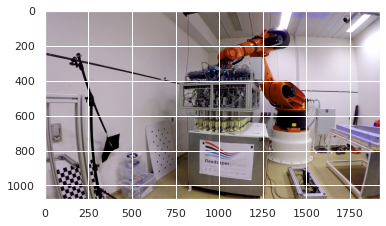

In [238]:
img = Image.open("gopro_robot.jpg")
arr = np.asarray(img)
plt.imshow(arr)

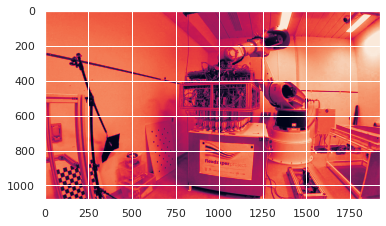

In [243]:
Q = arr[:, :, 0]
plt.imshow(Q)

In [266]:
def undistortImage(Q: np.array, K: np.array, dist_coffs: np.array):
    print(Q.shape)
    all_points = Q.reshape(np.product(Q.shape, dtype=int)//2, 2)
    distances = np.linalg.norm(Q, axis=0)
    coffs_dists = (distances * dist_coffs.reshape(dist_coffs.size, 1))
    sums = np.sum(coffs_dists, axis=0)
    


K = np.array([
    [875, 0, 540],
    [0, 875, 960],
    [0, 0, 1]
])

k3 = -0.245031
k5 = 0.071524
k7 = -0.00994978

coffs = np.array([k3, k5, k7])

undistorted = undistortImage(Q, K, coffs)

(1080, 1920)
